In [51]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

def warn (*args, **kwargs):
    pass

warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_columns", None)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
X_train_sin_outliers = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_test_sin_outliers.xlsx")
X_train_con_outliers = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_train_con_outliers.xlsx")
X_train_sin_outliers = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_train_sin_outliers.xlsx")
X_test_con_outliers = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_test_con_outliers.xlsx")
y_train = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/y_train.xlsx")
y_test = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/y_test.xlsx")


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    
    
]:
    model = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=5, 
    min_samples_leaf=5, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    n_jobs=9, 
    random_state=42,
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.7850162866449512, 0.6710097719869706]
Mejor Accuracy: 0.7850162866449512


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [53]:
model = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=5, 
    min_samples_leaf=5, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    n_jobs=8, 
    random_state=42,
)
model.fit(X_train_con_outliers, y_train)
y_pred_test = model.predict(X_test_con_outliers)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.7792207792207793


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


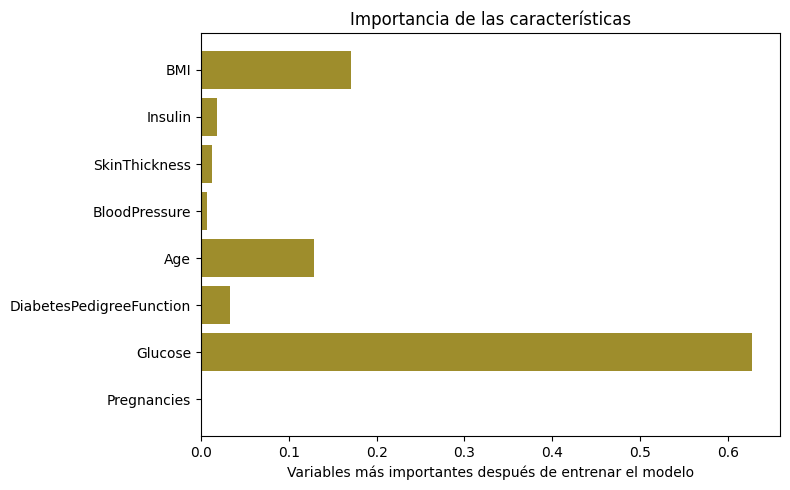

In [54]:
importances = model.feature_importances_
features = X_train_con_outliers.columns

# Visualizarlas
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="#9E8D2C")
plt.xlabel("Variables más importantes después de entrenar el modelo")
plt.title("Importancia de las características")
plt.tight_layout()
plt.show()

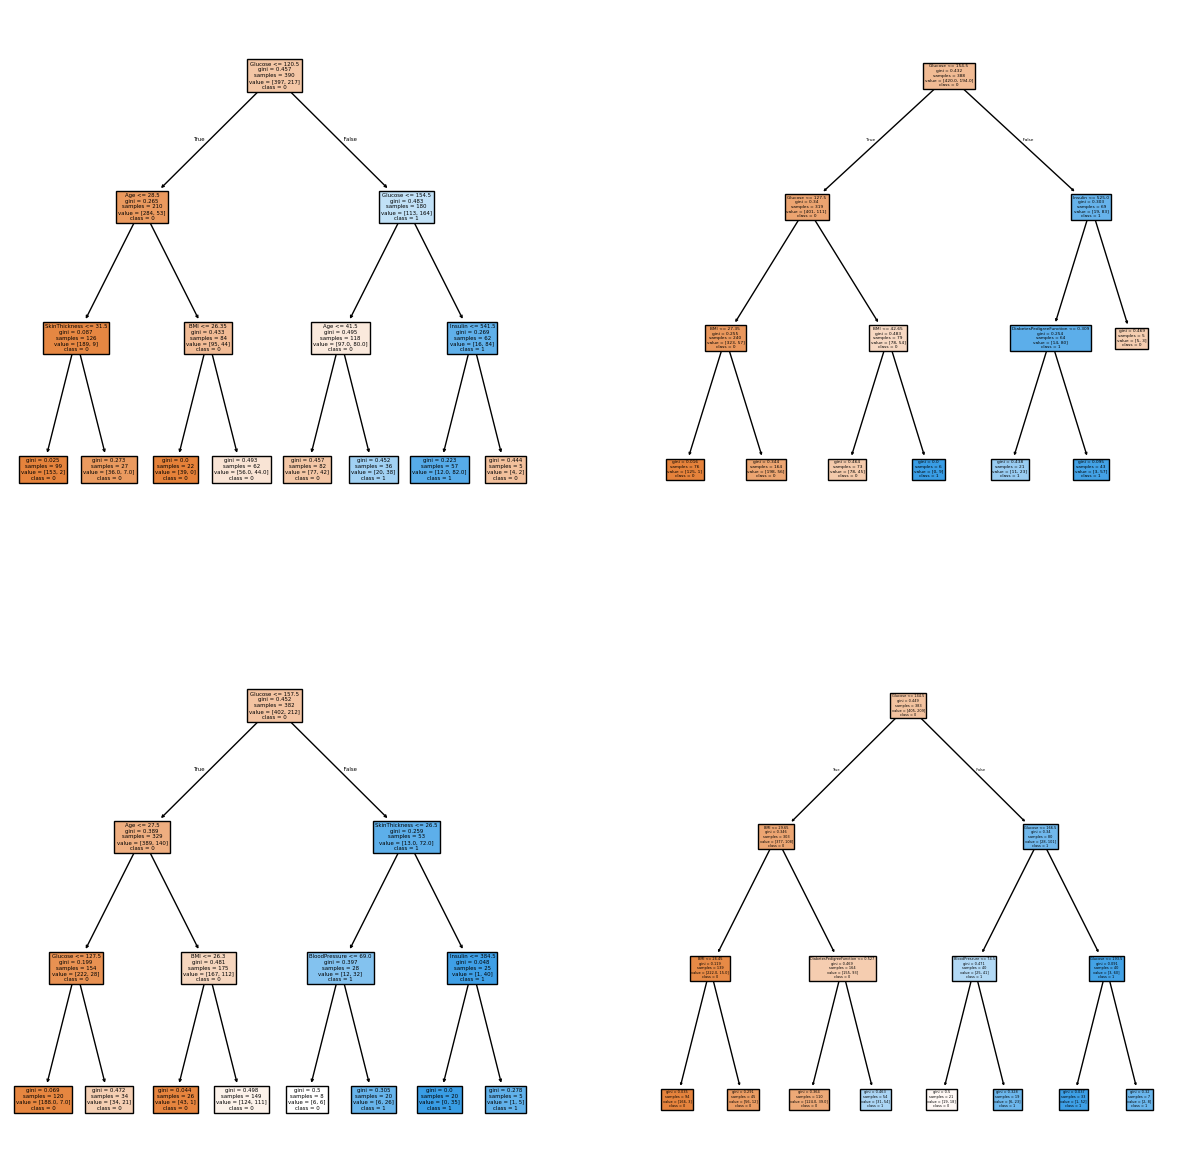

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [56]:
from pickle import dump

dump(model, open("../models/random_forest_classifier_default_42.sav", "wb"))